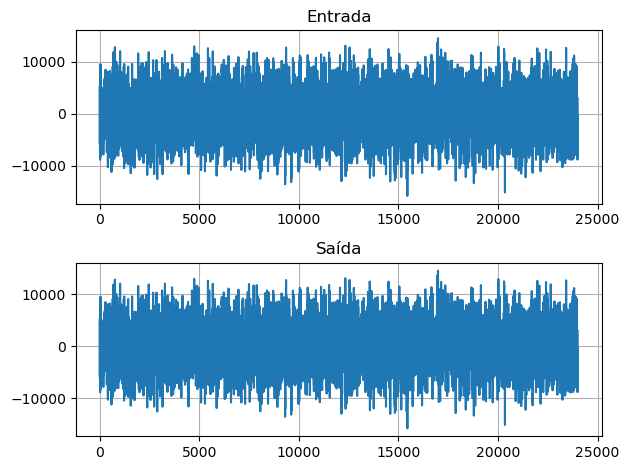

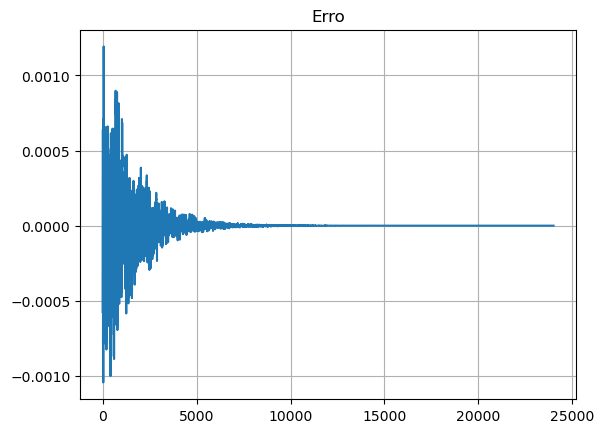

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Carregar Coeficientes
with open('coef_8.dat', 'r') as fid:
    coeficientes= numpy.fromfile(fid, numpy.float64)
    fid.close()

# Carregar Entrada
with open('ruido_branco.pcm', 'rb') as fid:
    x = np.fromfile(fid, np.int16)
fid.close()


taxa = 0.000000000005 #taxa
tam = 8 


#Sinal esperado
sd = np.zeros(len(x))
#Erro
e = np.zeros(len(x))
#Saida do filtro FIR
y = np.zeros(len(x))


# Sinal Esperado
for i in range(len(x)):
    for j in range(len(coef)):
        if (i - j) >= 0:
            amostrasD[j] = x[i - j] * float(coef[j])
    d[i] = amostrasD.sum()


for i in range(len(x)):
    for j in range(len(w)):
        if (i - j) >= 0:
            amostrasY[j] = x[i-j] * float(w[j])
    y[i] = amostrasY.sum()

    e[i] = d[i] - y[i]

    for k in range(len(w)):
        if (i - k) >= 0:
            w[k] = w[k] + (u * e[i] * x[i-k])

plt.subplot(2,1,1)
plt.plot(d)
plt.title("Entrada")
plt.grid()
plt.subplot(2,1,2)
plt.plot(y,)
plt.title("Saída")
plt.grid()
plt.tight_layout()
plt.show()

plt.plot(e,)
plt.title("Erro")
plt.grid()
plt.show()


with open("saida_py.pcm", 'w') as fid:
    np.array(y, dtype=np.int16).tofile(fid)
fid.close()